<a href="https://colab.research.google.com/github/michaelherediaperez/mecanica_de_solidos_un/blob/main/codigos/cap_04/04_03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3.3. Ley de Hooke generalizada para materiales isótropos

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Agosto 4, 2022 | Conversión de código de MAXIMA a Python|
|Michael Heredia Pérez, <mherediap@unal.edu.co> | Octubre 5, 2022 | Mejorando legibilidad del código y añadiendo sistema matricial|

## Despeje de las ecuaciones para $\sigma_x$, $\sigma_y$, $\sigma_z$

In [1]:
import sympy as sp

# Para imprimir bonito
sp.init_printing()
from IPython.display import Math                 
def imprimir (texto, variable):
    return Math(texto +  rf'{sp.latex(variable)}')

Defino las variables

In [2]:
ex, ey, ez     = sp.symbols("varepsilon_x, varepsilon_y, varepsilon_z")
sx, sy, sz     = sp.symbols("sigma_x, sigma_y, sigma_z")

# Recuerde que "lambda" es una palabra reservada de python.
E, nu, lamb_da = sp.symbols("E, nu, lambda")    

ex, ey, ez, sx, sy, sz, E, nu, lamb_da

Defino las ecuaciones, recuerde, igualando la ecuación a cero.

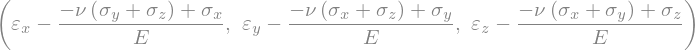

In [3]:
 eq_ex = ex - (1/E)*(sx - nu*(sy + sz))   # eq 1
 eq_ey = ey - (1/E)*(sy - nu*(sx + sz))   # eq 2
 eq_ez = ez - (1/E)*(sz - nu*(sx + sy))   # eq 3

 eq_ex, eq_ey, eq_ez

Despejo sx, sy y sx de las ecuaciones

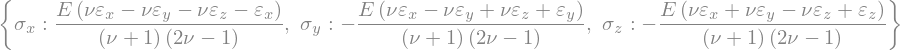

In [4]:
sp.factor( sp.solve([eq_ex, eq_ey, eq_ez], (sx, sy, sz)) )

## Coeficientes de la matriz constitutiva $D$

Se definen las variables faltantes (esfuerzos cortantes y deformacines tangenciales)

In [5]:
txy, txz, tyz  = sp.symbols("tau_xy, tau_xz, tau_yz")
gxy, gxz, gyz  = sp.symbols("gamma_xy, gamma_xz, gamma_yz")

txy, txz, tyz, gxy, gxz, gyz

Se define la delatación cúbica (eq. 4.28)

In [6]:
e = ex + ey + ez
imprimir(r"e = ", e)

<IPython.core.display.Math object>

Las constantes de Lamé

In [7]:
lamb_da = nu*E / ((1+nu) * (1-2*nu))    # eq. 4.15, primera constante de Lamé.
G = E / (2 * (1+nu))                    # eq 4.8,   segunda constante de Lamé.

In [8]:
imprimir(r"\lambda = ", lamb_da)

<IPython.core.display.Math object>

In [9]:
imprimir(r"G = ", G)

<IPython.core.display.Math object>

Se definen las ecuaciones de Lamé (eq 4.14), recordadno que deben estar igualadas a cero.

In [10]:
sx = lamb_da*e + 2*G*ex         # 4.14a
sy = lamb_da*e + 2*G*ey         # 4.14b
sz = lamb_da*e + 2*G*ez         # 4.14c

txy = G*gxy                     # 4.14d
txz = G*gxz                     # 4.14e
tyz = G*gyz                     # 4.14f

Se despeja la matriz constitutiva $D$ para el caso isótropo. En MAXIMA se emplea el comando ```coefmatrix```, pero en sympy tenemos ```linear_eq_to_matrix()```.

In [11]:
D = sp.linear_eq_to_matrix([sx, sy, sz, txy, txz, tyz], (ex, ey, ez, gxy, gxz, gyz))[0]
imprimir(r"\boldsymbol{D} = ", D)

<IPython.core.display.Math object>

Podemos factorizar la matriz $\frac{E}{1+\nu}$ de la matriz $\boldsymbol{D}$ 

In [12]:
D = sp.simplify(D / (E/(1+nu)))
imprimir(r"\boldsymbol{D} = \frac{E}{1+\nu}", D)

<IPython.core.display.Math object>

NOTA: Podrá pensar que el resultado es el negativo de lo que debería ser, pero no lo es, simplemente debe factorizar (-1) de los términos fraccionarios asociados a los esfuerzos normales.

## Sistema matricial con la ecuación 4.17

El sistema de ecuaciones (4.14) se puede expresar como una relación entre la matriz de tensiones $\underline{\underline{\boldsymbol{\sigma}}}$ y la de deformaciones matemáticas $\underline{\underline{\boldsymbol{\varepsilon}}}$ (3.15):

$$\underline{\underline{\boldsymbol{\sigma}}} = \lambda \text{tr}(\underline{\underline{\boldsymbol{\varepsilon}}}) + 2G\underline{\underline{\boldsymbol{\varepsilon}}}$$

Lo cual en notación tensorial se escribe como:

$$  \sigma_{ij} = \lambda \delta_{ij}\varepsilon_{kk} + 2G\varepsilon_{ij}  $$

In [13]:
# Defio simbólicamente las deformaciones angulares matemáticas.
exy, exz, eyz = sp.symbols("varepsilon_xy, varepsilon_xz, varepsilon_yz")

# Defino la matriz de esfuerzos.
sigma = sp.Matrix([[sx, txy, txz],
                   [txy, sy, tyz],
                   [txz, tyz, sz]])

# Defino la matriz de deformaciones matemáticas.
epsilon = sp.Matrix([[ex,  exy, exz],
                     [exy, ey,  eyz],
                     [exz, eyz, ez]])

# La matriz identidad de orden 3
I = sp.eye(3)

sigma = lamb_da*sp.trace(epsilon)*I + 2*G*epsilon
imprimir(r"\underline{\underline{\boldsymbol{\sigma}}} = ", sigma)

<IPython.core.display.Math object>

In [14]:
imprimir(r"\sigma_x = ", sp.factor(sigma[0,0]))

<IPython.core.display.Math object>

In [15]:
imprimir(r"\sigma_y = ", sp.factor(sigma[1,1]))

<IPython.core.display.Math object>

In [16]:
imprimir(r"\sigma_z = ", sp.factor(sigma[2,2]))

<IPython.core.display.Math object>

In [17]:
imprimir(r"\tau_{xy} = ", sp.factor(sigma[0,1]))

<IPython.core.display.Math object>

In [18]:
imprimir(r"\tau_{xz} = ", sp.factor(sigma[0,2]))

<IPython.core.display.Math object>

In [19]:
imprimir(r"\tau_{yz} = ", sp.factor(sigma[1,2]))

<IPython.core.display.Math object>

**NOTA:** Tenga en cuenta que las ecuaciones anteriores son válidas para materiales con comportamiento **elástico, lineal e isótropo**.